# Data Exploration

In [136]:
import pandas as pd 


df = pd.read_csv("combined_listings2.csv")


# Visualisation

bedrooms
1           29366
2           12009
3            4383
4            2206
5             743
6             151
7              39
8              10
9               4
10             11
11              1
12              1
14              1
15              1
16              1
19              1
20              1
30              1
dtype: int64


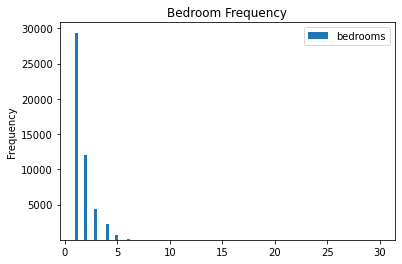

In [137]:

import matplotlib.pyplot as plt
import numpy as np

temp = df[['bedrooms']].copy()

temp = temp.dropna(subset=['bedrooms'])

temp['bedrooms'] = temp['bedrooms'].astype('int32')

print(temp.value_counts().head(19).sort_index())

temp.plot.hist(bins=100, bottom=0.001,title='Bedroom Frequency')

plt.show()

price  
15000.0    2
14589.0    1
14568.0    1
14315.0    1
13936.0    1
          ..
14.0       6
13.0       3
12.0       1
11.0       2
0.0        1
Length: 1434, dtype: int64


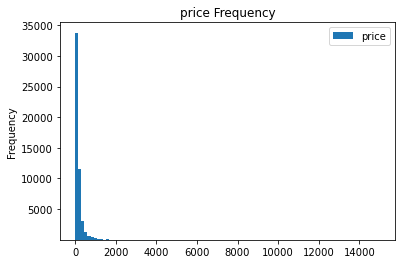

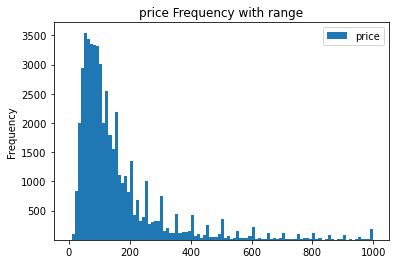

In [138]:
temp = df[['price']].copy()


temp = temp.dropna(subset=['price'])
temp['price'] = temp['price'].replace('[\$,]', '', regex=True).astype(float)

print(temp.value_counts().sort_index(ascending=False))

temp.plot.hist(bins=100, bottom=0.01,title='price Frequency')

plt.show()

temp.plot.hist(bins=100, bottom=0.01,title='price Frequency with range',range=(0,1000))

plt.show()

   latitude  longitude   location
0 -37.77268  145.09213  melbourne
1 -37.76651  144.98074  melbourne
2 -37.85999  144.97662  melbourne
3 -38.05725  145.33936  melbourne
4 -37.69729  145.00082  melbourne
5 -37.89960  145.11447  melbourne
6 -38.14932  145.14157  melbourne
7 -37.81804  145.00442  melbourne
8 -37.81486  144.96267  melbourne
9 -37.87629  144.98964  melbourne


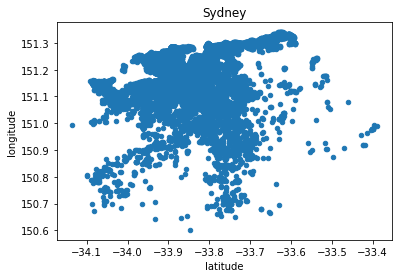

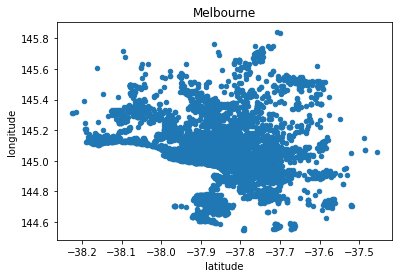

In [212]:
#Location
temp2 = df[['latitude','longitude','location']].copy()
temp2['latitude'] = temp2['latitude'].astype(float)
temp2['longitude'] = temp2['longitude'].astype(float)

print(temp2.head(10))

temp2[temp2['location'] == 'sydney'].plot.scatter(x = 'latitude', y ='longitude',title= "Sydney")
temp2[temp2['location'] =='melbourne'].plot.scatter(x = 'latitude', y ='longitude',title= "Melbourne" )
plt.show()

In [176]:
temp = df[['amenities']].copy()

temp.value_counts()

array = []

amenities_total = {}
flag = False;
#go through all records
for listing in temp['amenities']:
    #go through all amenities in single listing
    listing = listing.split(",")
    for amenities in listing:
        #check for dups
        flag = False
        
        for amenitieslist in amenities_total:            
            if len(amenities.split('"')) > 1:
                if amenitieslist == amenities.split('"')[1]:
                    flag = True
        if len(amenities.split('"')) > 1:
            #if we found our amenities in the list than update total or add an item with count to 1
            
            if flag:                
                array.append(amenities.split('"')[1])
                amenities_total[amenities.split('"')[1]]= int(amenities_total[amenities.split('"')[1]]) + 1
            else:
                array.append(amenities.split('"')[1])
                amenities_total[amenities.split('"')[1]] = 1
            


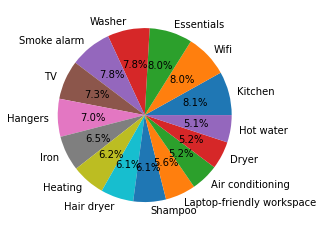

total unique Amenities: 185
-------
Least used Amenities
Lounge chairs    1
Steam room       1
Internet         1
Kayaks           1
Bicycle          1
dtype: int64


In [201]:
#

total = pd.Series(data=array)
total.value_counts().sort_values(ascending=False).head(15).plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.show()
print("total unique Amenities: "+str(len(amenities_total)))
print("-------")
print("Least used Amenities")
print(total.value_counts().sort_values(ascending=True).head(5))

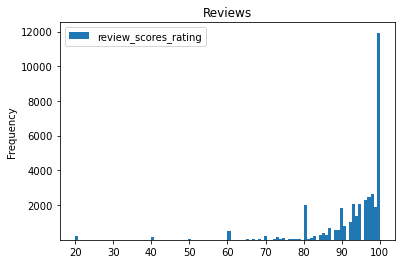

In [214]:
#avability
temp = df[['review_scores_rating']].copy()

temp.plot.hist(bins=100, bottom=0.01,title='Reviews')
plt.show()

# Data pre-processing
